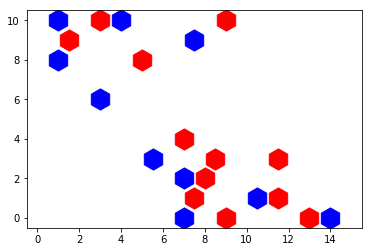

ERROR ficha donde ya habia


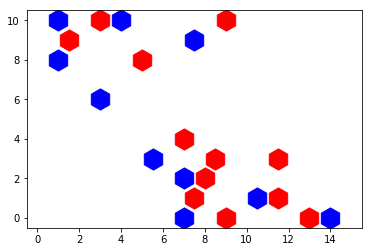

In [45]:
%matplotlib inline
import time
import random
import pylab as pl
from IPython import display

#Tamaño del tambleo
tam = 11
#Colores de los jugadores
colors = ['white','red','blue',]

#Inicialización de la malla
x = list(range(0,tam))
for i in range(tam-1):
    x_aux = x[-tam:]
    for j in range(tam):
        x_aux[j] += 0.5
    x = x + x_aux
y = []
cont = tam-1
for i in range(tam):
    for j in range(tam):
        y = y + [cont]
    cont -= 1

#Parametros de la grafica
xmax = tam-1 + tam/2
xmin = -0.5
ymax = tam-1 + 0.5
ymin = -0.5
pl.xlim(xmin, xmax)
pl.ylim(ymin, ymax)

#Tamaño de los hexagonos
size = (11/tam)**(2)

#Inicialización del estado
estado = [[0]*11 for i in range(11)]
accionEj = [3,5] #Ejemplo de forma de la accion de salida del agente que pone una ficha en la fila 3 y columna 5

#Ciclo general del juego, debera ser un while mientras nadie haya ganado o 121 iteraciones
jugadorActual = 1 #inicializacion del jugador
for i in range(tam*tam):
    #aux = colors[random.randint(0,2)]
    
    #ASI VA A SER COMO SE LLAMA AL AGENTE DE CADA UNO

    if jugadorActual == 1:
        #####!! accion = Agente_Nombre1_Nombre2(estado,jugadorActual)
         #Para efectos del ejemplo genera una accion aleatoria, esta puede repetir lugar porque esta comentada la parte que lo chequea
        accionEj = [random.randint(0,10),random.randint(0,10)]
    else:
        #####!! accion = Agente_Nombre3_Nombre4(estado,jugadorActual)
         #Para efectos del ejemplo genera una accion aleatoria, esta puede repetir lugar porque esta comentada la parte que lo chequea
        accionEj = [random.randint(0,10),random.randint(0,10)]
    #Actualizacion del estado del tablero
    if estado[accionEj[0]][accionEj[1]] == 0:
        estado[accionEj[0]][accionEj[1]] = jugadorActual
            #Actualizacion del grafico
        pl.scatter(x[accionEj[0]+11*accionEj[1]],y[accionEj[0]+11*accionEj[1]], marker='h', s=size*450, color=colors[jugadorActual])
        display.clear_output(wait=True)
        display.display(pl.gcf())
        
    else:
        print('ERROR ficha donde ya habia')
        break
    
    #ACA SE CHEQUEARIA SI ALGUIEN GANO
    

    #Cambio de jugados
    if (i+1)%2 == 0:
        jugadorActual = 2
    else:
        jugadorActual = 1
   

In [10]:
start = time.time()
cont = 0
for i in range(0,1000000):
    cont += 1
end = time.time()
print(end - start)

0.13161015510559082
